In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pandas.io.formats.style_render import Index
path = 'diemthi2021.csv'

df = pd.read_csv(path)
df

,Unnamed: 0,id,year,mathematics_score,literature_score,physics_score,chemistry_score,biology_score,foreign_language_score,foreign_language_type,english_score,history_score,geography_score,civic_education_score,chinese_score,japanese_score,korean_score,french_score,german_score,russian_score
0,0,1000046,2022,8.0,6.25,7.25,5.5,4.75,4.6,N1,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1000031,2022,7.0,7.75,NaN,NaN,NaN,8.8,N1,8.8,6.25,5.00,9.00,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1000012,2022,6.4,7.50,NaN,NaN,NaN,NaN,NaN,NaN,4.75,5.00,8.00,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1000087,2022,8.4,8.00,NaN,NaN,NaN,9.4,N1,9.4,6.75,6.50,8.25,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1000071,2022,7.6,8.25,6.25,5.0,3.25,6.6,N1,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995376,995376,64006555,2022,6.2,4.75,NaN,NaN,NaN,2.8,N1,2.8,5.00,6.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN
995377,995377,64006584,2022,8.4,6.75,NaN,NaN,NaN,4.6,N1,4.6,6.50,6.75,9.00,NaN,NaN,NaN,NaN,NaN,NaN
995378,995378,64006576,2022,6.6,5.25,NaN,NaN,NaN,3.2,N1,3.2,4.50,5.50,8.50,NaN,NaN,NaN,NaN,NaN,NaN
995379,995379,64006583,2022,5.0,6.50,NaN,NaN,NaN,3.8,N1,3.8,6.75,7.50,8.50,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
os.listdir()

['.config', 'diemthi2021.csv', 'drive', 'sample_data']

In [ ]:
df.groupby('mathematics_score')


In [ ]:
# Tính số thí sinh thi từng Khối.
df['Khoi_A'] = df['mathematics_score'] + df['physics_score'] + df['chemistry_score']
df['Khoi_A1'] = df['mathematics_score'] + df['physics_score'] + df['english_score']
df['Khoi_B'] = df['mathematics_score'] + df['biology_score'] + df['chemistry_score']
df['Khoi_C'] = df['literature_score'] + df['history_score'] + df['geography_score']
df['Khoi_D'] = df['mathematics_score'] + df['literature_score'] + df['english_score']
df.head()

,Unnamed: 0,id,year,mathematics_score,literature_score,physics_score,chemistry_score,biology_score,foreign_language_score,foreign_language_type,...,japanese_score,korean_score,french_score,german_score,russian_score,Khoi_A,Khoi_A1,Khoi_B,Khoi_C,Khoi_D
0,0,1000046,2022,8.0,6.25,7.25,5.5,4.75,4.6,N1,...,NaN,NaN,NaN,NaN,NaN,20.75,19.85,18.25,NaN,18.85
1,1,1000031,2022,7.0,7.75,NaN,NaN,NaN,8.8,N1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,23.55
2,2,1000012,2022,6.4,7.50,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.25,NaN
3,3,1000087,2022,8.4,8.00,NaN,NaN,NaN,9.4,N1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.25,25.80
4,4,1000071,2022,7.6,8.25,6.25,5.0,3.25,6.6,N1,...,NaN,NaN,NaN,NaN,NaN,18.85,20.45,15.85,NaN,22.45


In [ ]:
A = df['Khoi_A'].count()
A1 = df['Khoi_A1'].count()
B = df['Khoi_B'].count()
C = df['Khoi_C'].count()
D = df['Khoi_D'].count()
lst_Khoi = [A,A1,B,C,D]
print(lst_Khoi)


[323660, 311518, 322111, 656898, 862288]


Text(0, 0.5, 'Số lượng thí sinh thi')

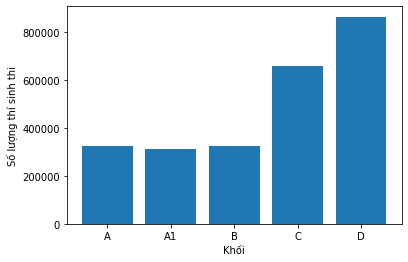

In [ ]:
# Biểu đồ thể hiện từng Khối
Khoi = ['A','A1','B','C','D']
plt.bar(x= Khoi,height = lst_Khoi)
plt.xlabel('Khối')
plt.ylabel('Số lượng thí sinh thi')


[21.09548986590868, 20.28915391726963, 19.40390998755088, 19.45214457952377, 18.421744985434096]
[323660, 311518, 322111, 656898, 862288]


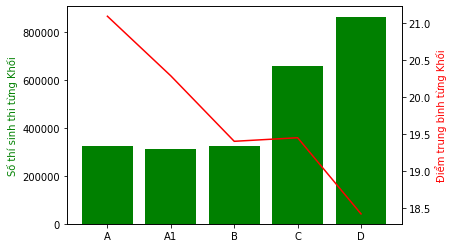

In [ ]:
# Trung Bình từng khối
tb_A = df.Khoi_A.mean()
tb_A1 = df.Khoi_A1.mean()
tb_B = df.Khoi_B.mean()
tb_C = df.Khoi_C.mean()
tb_D = df.Khoi_D.mean()

lst_tb = [tb_A,tb_A1,tb_B,tb_C,tb_D]
print(lst_tb)
print(lst_Khoi)

#Đồ thị thể hiện Điểm TB từng khối và số thí sinh tham gia thi
x = Khoi
y1 = lst_Khoi
y2 = lst_tb

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'r-')
ax1.set_ylabel('Số thí sinh thi từng Khối', color='g')
ax2.set_ylabel('Điểm trung bình từng Khối', color='r')

plt.show()

[6.466, 6.508, 5.147, 6.724, 6.704, 5.019, 6.344, 6.678]


Text(0, 0.5, 'Điểm trung bình')

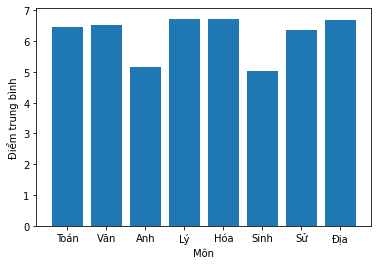

In [ ]:
#Điểm trung bình của từng môn và Biểu đồ
d_Toan = df['mathematics_score'].mean()
toan = round(d_Toan,3)

d_Van = df['literature_score'].mean()
van = round(d_Van,3)

d_Anh = df['english_score'].mean()
anh = round(d_Anh,3)

d_Ly = df['physics_score'].mean()
ly = round(d_Ly,3)

d_Hoa = df['chemistry_score'].mean()
hoa = round(d_Hoa,3)

d_Sinh = df['biology_score'].mean()
sinh = round(d_Sinh,3)

d_Su = df['history_score'].mean()
su = round(d_Su,3)

d_Dia = df['geography_score'].mean()
dia = round(d_Dia,3)

lst_dtb = [toan, van, anh, ly, hoa, sinh ,su ,dia]
print(lst_dtb)
Mon = ['Toán','Văn','Anh','Lý','Hóa','Sinh','Sử','Địa']
plt.bar(x=Mon,height = lst_dtb)
plt.xlabel('Môn')
plt.ylabel('Điểm trung bình')

[2467, 819, 286, 698, 80, 70]


Text(0, 0.5, 'Số lượng thí sinh dự thi')

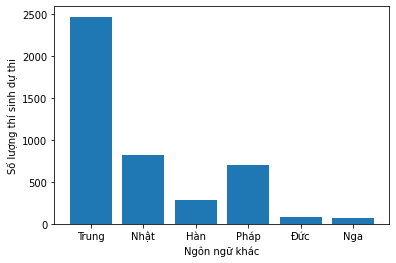

In [ ]:
#Thống kê thí sinh đăng kí ngôn ngữ khác Tiếng Anh
Trung = df['chinese_score'].count()
Nhat = df['japanese_score'].count()
Han = df['korean_score'].count()
Phap = df['french_score'].count()
Duc = df['german_score'].count()
Nga = df['russian_score'].count()
lst_ngonngu = [Trung,Nhat,Han,Phap,Duc,Nga,]
print(lst_ngonngu)

NgonNgu = ['Trung','Nhật','Hàn','Pháp','Đức','Nga']
plt.bar(x=NgonNgu,height=lst_ngonngu)
plt.xlabel('Ngôn ngữ khác')
plt.ylabel('Số lượng thí sinh dự thi')

Text(0, 0.5, 'Số lượng thí sinh:')

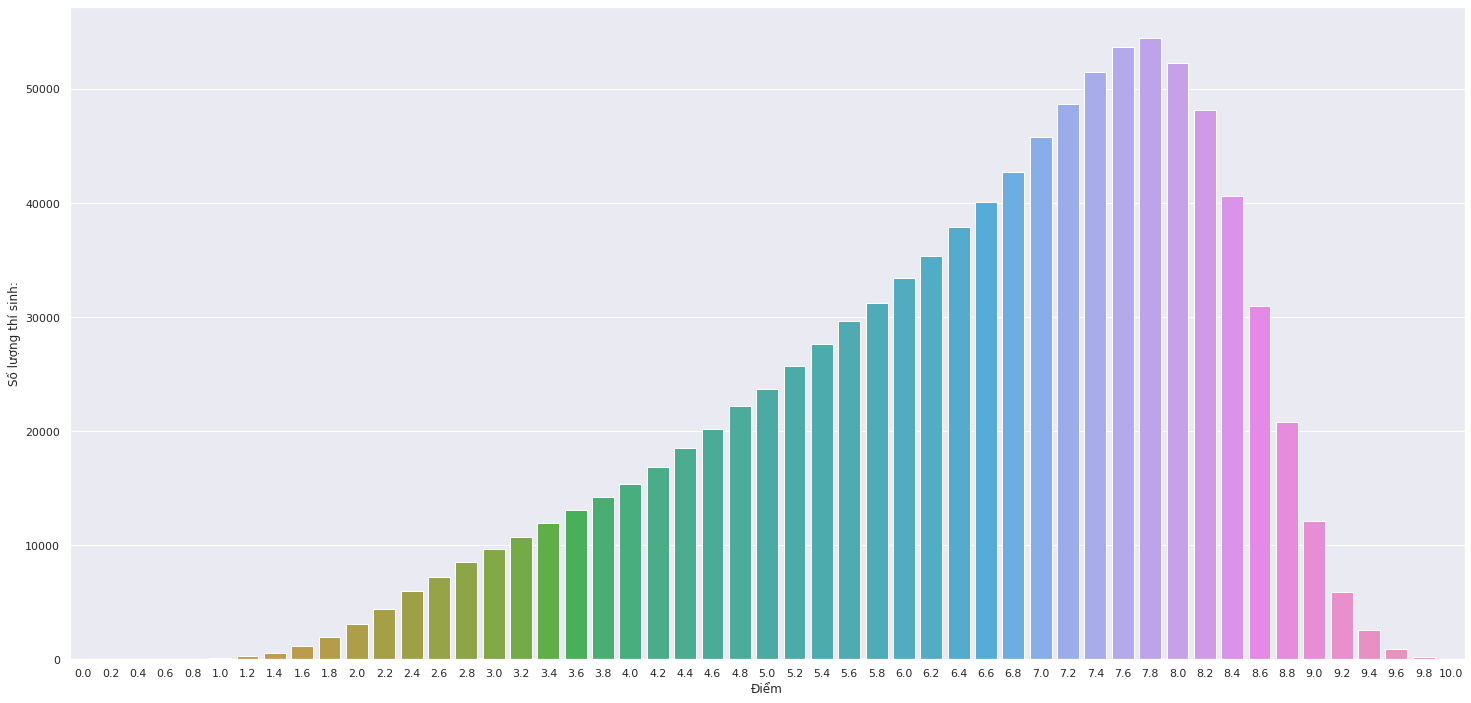

In [ ]:
#Điểm môn Toán

sns.set(rc={'figure.figsize':(25,12)})
sns.countplot(x=df['mathematics_score'])
plt.xlabel('Điểm')
plt.ylabel('Số lượng thí sinh:')


In [ ]:
#Top10 thí sinh điểm Khối A
top_10=df[['id', 'Khoi_A']].dropna().sort_values('Khoi_A', ascending=True)[-10:]
print('Top 10 thí sinh có điểm thi khối A cao nhất')
top_10


Top 10 thí sinh có điểm thi khối A cao nhất


,id,Khoi_A
473854,27005413,29.55
90412,1090975,29.55
451532,26003263,29.55
398962,22003022,29.55
202568,3021165,29.55
177190,2080716,29.80
461553,26013396,29.80
547171,29030869,29.80
347568,18008505,29.80
68141,1068510,30.00


[20.576, 20.722, 19.121, 19.492, 19.99]


Text(0, 0.5, 'Điểm trung bình')

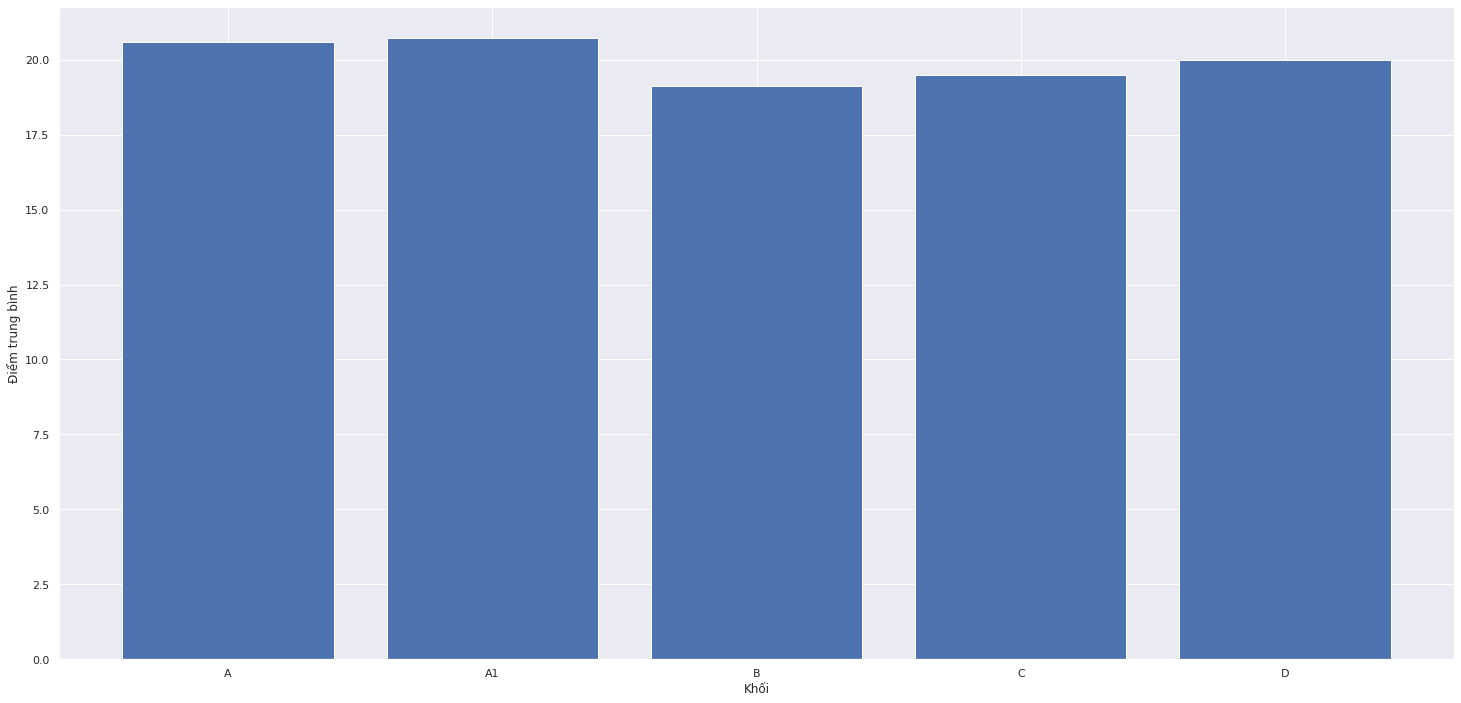

In [ ]:
#Số đầu của ID chính là mã vùng. 2 là của TPHCM
#Đtb từng Khối ở TPHCM
ts_HCM = df[df.id > 2000000]
ts_HCM = ts_HCM[df[df.id > 2000000].id < 2999999]

hcm1 = round(ts_HCM.Khoi_A.mean(),3)
hcm2 =round(ts_HCM.Khoi_A1.mean(),3)
hcm3 = round(ts_HCM.Khoi_B.mean(),3)
hcm4 = round(ts_HCM.Khoi_C.mean(),3)
hcm5 = round(ts_HCM.Khoi_D.mean(),3)

lst_hcm = [hcm1,hcm2,hcm3,hcm4,hcm5]

print(lst_hcm)

#Biểu đồ
plt.bar(x=Khoi,height=lst_hcm)
plt.xlabel('Khối')
plt.ylabel('Điểm trung bình')

số lượng thí sinh HN HCM DN [96942, 84594, 12574]
[6.765761363280395, 7.057091553399212, 6.7494851994852]


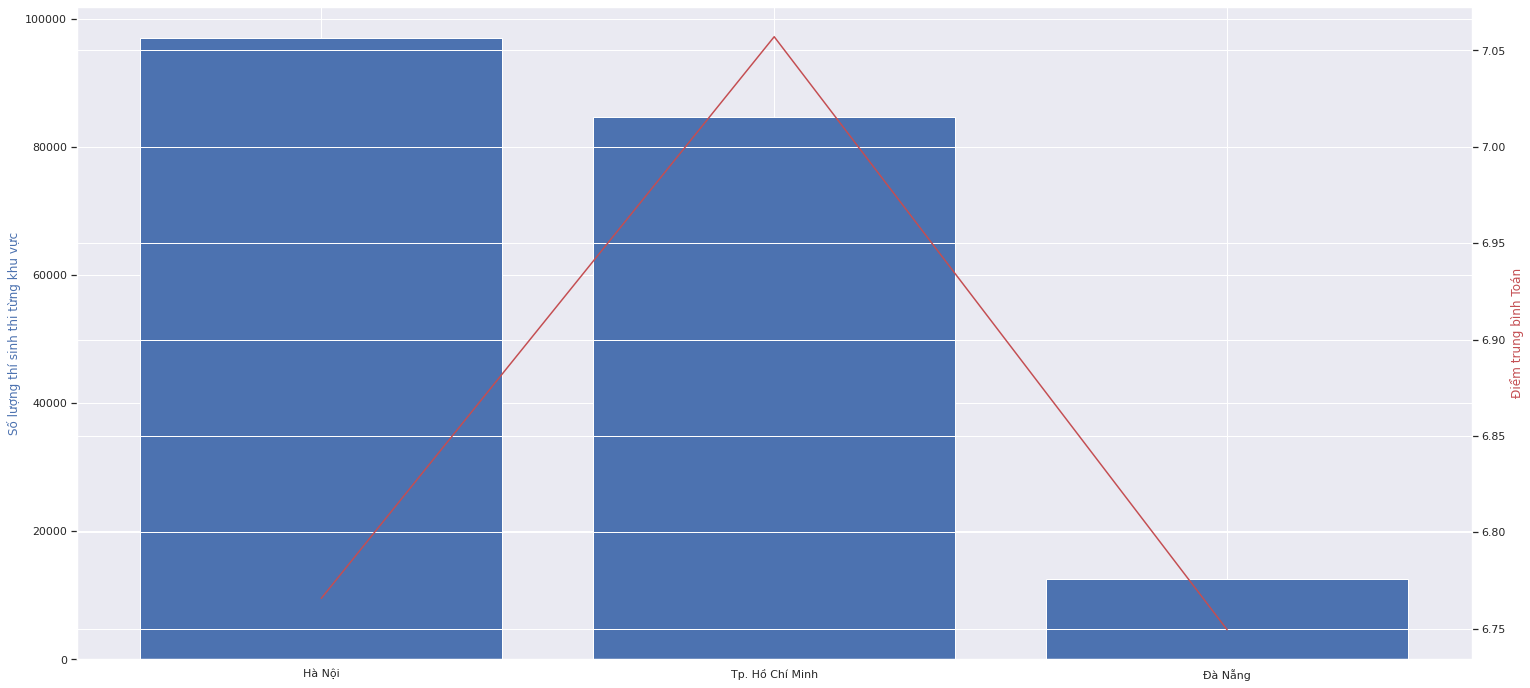

In [ ]:
#Hà Nội
ts_HN = df[df.id > 1000000]
ts_HN = ts_HN[df[df.id > 1000000].id < 1999999]
hn_toan = ts_HN.mathematics_score.mean()
soluong_HN = ts_HN.id.count()

#TPHCM
hcm_toan = ts_HCM.mathematics_score.mean()
soluong_HCM = ts_HCM.id.count()

#Đà Nẵng
ts_DN = df[df.id > 4000000]
ts_DN = ts_DN[df[df.id > 4000000].id < 4999999]
dn_toan = ts_DN.mathematics_score.mean()
soluong_DN = ts_DN.id.count()

lst_soluong = [soluong_HN, soluong_HCM, soluong_DN]
print('số lượng thí sinh HN HCM DN',lst_soluong)
lst_Toantb = [hn_toan, hcm_toan, dn_toan]
print(lst_Toantb)

lst_tp = [ 'Hà Nội','Tp. Hồ Chí Minh', 'Đà Nẵng']

#Biểu đồ thể hiệm điểm TB và số lượng thí sinh ở Hà Nội, Tp. Hồ Chí Minh, Đà Nẵng

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(lst_tp, lst_soluong, color='b')
ax2.plot(lst_tp, lst_Toantb, 'r-')
ax1.set_ylabel('Số lượng thí sinh thi từng khu vực', color='b')
ax2.set_ylabel('Điểm trung bình Toán', color='r')

plt.show()



[73562, 478201, 365250, 65657]


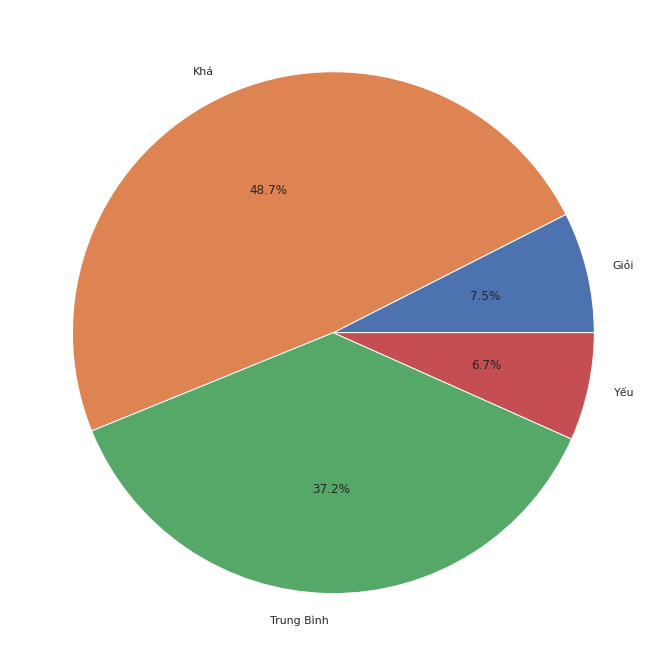

In [ ]:


#biểu đồ thể hiện phần trăm điểm toán của học sinh

Gioi = df['mathematics_score'][df.mathematics_score <= 10][df.mathematics_score >= 8.5].count()
Kha = df['mathematics_score'][df.mathematics_score < 8.5][df.mathematics_score >= 6.5].count()
TB = df['mathematics_score'][df.mathematics_score < 6.5][df.mathematics_score >= 3.5].count()
Yeu = df['mathematics_score'][df.mathematics_score < 3.5][df.mathematics_score >= 0].count()
lst_XepLoaiDiemToan = [Gioi, Kha, TB, Yeu]
lst_XL = ['Giỏi', 'Khá','Trung Bình', 'Yếu']
print(lst_XepLoaiDiemToan)
plt.pie(lst_XepLoaiDiemToan,labels=lst_XL,autopct="%0.1f%%")
plt.show()

In [ ]:
df.describe()

,Unnamed: 0,id,year,mathematics_score,literature_score,physics_score,chemistry_score,biology_score,foreign_language_score,english_score,...,japanese_score,korean_score,french_score,german_score,russian_score,Khoi_A,Khoi_A1,Khoi_B,Khoi_C,Khoi_D
count,995381.000000,9.953810e+05,995381.0,982670.000000,981351.000000,325510.000000,327353.000000,322185.000000,870571.000000,866151.000000,...,819.000000,286.000000,698.000000,80.000000,70.000000,323660.000000,311518.000000,322111.000000,656898.000000,862288.000000
mean,497690.000000,2.759687e+07,2022.0,6.466307,6.507771,6.723776,6.703872,5.019119,5.157718,5.146637,...,7.021001,6.168531,7.527507,6.867500,8.888571,21.095490,20.289154,19.403910,19.452145,18.421745
std,287341.888486,1.917116e+07,0.0,1.675402,1.379598,1.441914,1.600390,1.448270,1.949552,1.942451,...,2.306926,1.883555,2.216118,1.902415,1.506175,3.237808,3.339265,3.155507,3.564135,3.877461
min,0.000000,1.000001e+06,2022.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.600000,2.000000,2.000000,2.800000,3.000000,5.100000,4.900000,4.300000,1.000000,3.650000
25%,248845.000000,1.000216e+07,2022.0,5.400000,5.580000,5.750000,5.500000,4.000000,3.600000,3.600000,...,5.000000,4.600000,5.800000,5.600000,8.500000,19.100000,18.100000,17.300000,17.000000,15.700000
50%,497690.000000,2.801888e+07,2022.0,6.800000,6.500000,7.000000,7.000000,4.750000,4.800000,4.800000,...,7.600000,6.000000,8.400000,7.200000,9.400000,21.450000,20.400000,19.550000,19.750000,18.550000
75%,746535.000000,4.400583e+07,2022.0,7.800000,7.500000,7.750000,8.000000,6.000000,6.600000,6.600000,...,9.000000,7.600000,9.400000,8.400000,9.800000,23.450000,22.700000,21.600000,22.000000,21.250000
max,995380.000000,6.400659e+07,2022.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,9.600000,10.000000,30.000000,29.800000,29.350000,29.750000,28.700000


In [ ]:
#Loại bỏ các cột không liên quan để phân lớp dữ liệu dựa vào Khối A
df.drop('Unnamed: 0',axis = 1, inplace = True)
df.drop('id',axis = 1,inplace = True)
df.drop('literature_score',axis = 1,inplace = True)
df.drop('biology_score',axis = 1,inplace = True)
df.drop('foreign_language_score',axis = 1,inplace = True)
df.drop('foreign_language_type',axis = 1,inplace = True)
df.drop('english_score',axis = 1,inplace = True)
df.drop('history_score',axis = 1,inplace = True)
df.drop('geography_score',axis = 1,inplace = True)
df.drop('civic_education_score',axis = 1,inplace = True)
df.drop('chinese_score',axis = 1,inplace = True)
df.drop('japanese_score',axis = 1,inplace = True)
df.drop('french_score',axis = 1,inplace = True)
df.drop('german_score',axis = 1,inplace = True)
df.drop('russian_score',axis = 1,inplace = True)
df.drop('year',axis = 1,inplace = True)
df.drop('Khoi_A1',axis = 1,inplace = True)
df.drop('Khoi_B',axis = 1,inplace = True)
df.drop('Khoi_C',axis = 1,inplace = True)
df.drop('Khoi_D',axis = 1,inplace = True)
df.drop('korean_score',axis = 1,inplace = True)

In [ ]:

df.head()

,mathematics_score,physics_score,chemistry_score,Khoi_A
0,8.0,7.25,5.5,20.75
1,7.0,NaN,NaN,NaN
2,6.4,NaN,NaN,NaN
3,8.4,NaN,NaN,NaN
4,7.6,6.25,5.0,18.85


In [ ]:
df.dropna()

,mathematics_score,physics_score,chemistry_score,Khoi_A
0,8.0,7.25,5.50,20.75
4,7.6,6.25,5.00,18.85
5,7.8,3.75,7.75,19.30
6,8.8,7.50,4.75,21.05
8,6.4,3.50,8.00,17.90
...,...,...,...,...
995349,7.2,6.25,5.25,18.70
995350,7.4,6.00,6.50,19.90
995353,6.4,6.75,6.00,19.15
995361,5.8,5.00,5.00,15.80


In [ ]:
#Ảnh hưởng điểm Toán, Lý, Hóa đến điểm tổng khối A
df.corr()

,mathematics_score,physics_score,chemistry_score,Khoi_A
mathematics_score,1.000000,0.570030,0.481670,0.791471
physics_score,0.570030,1.000000,0.390213,0.809517
chemistry_score,0.481670,0.390213,1.000000,0.811989
Khoi_A,0.791471,0.809517,0.811989,1.000000


In [ ]:
#Xếp hạng cho các thí sinh Khối A
cut_labels = ['TB Yếu', 'Khá', 'Giỏi']
cut_bins = [0, 19, 24, 30]
df['Khoi_A_rank'] = pd.cut(df['Khoi_A'], bins=cut_bins, labels=cut_labels)
df1 = df.dropna()
df1

,mathematics_score,physics_score,chemistry_score,Khoi_A,Khoi_A_rank
0,8.0,7.25,5.50,20.75,Khá
4,7.6,6.25,5.00,18.85,TB Yếu
5,7.8,3.75,7.75,19.30,Khá
6,8.8,7.50,4.75,21.05,Khá
8,6.4,3.50,8.00,17.90,TB Yếu
...,...,...,...,...,...
995349,7.2,6.25,5.25,18.70,TB Yếu
995350,7.4,6.00,6.50,19.90,Khá
995353,6.4,6.75,6.00,19.15,Khá
995361,5.8,5.00,5.00,15.80,TB Yếu


In [ ]:
df1.groupby('Khoi_A_rank').size()

Khoi_A_rank
TB Yếu     78420
Khá       185373
Giỏi       59867
dtype: int64

In [ ]:
df1.drop('Khoi_A', axis = 1, inplace = True)
df1

<ipython-input-30-6c289e89772b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('Khoi_A', axis = 1, inplace = True)


,mathematics_score,physics_score,chemistry_score,Khoi_A_rank
0,8.0,7.25,5.50,Khá
4,7.6,6.25,5.00,TB Yếu
5,7.8,3.75,7.75,Khá
6,8.8,7.50,4.75,Khá
8,6.4,3.50,8.00,TB Yếu
...,...,...,...,...
995349,7.2,6.25,5.25,TB Yếu
995350,7.4,6.00,6.50,Khá
995353,6.4,6.75,6.00,Khá
995361,5.8,5.00,5.00,TB Yếu


In [ ]:
df1

,mathematics_score,physics_score,chemistry_score,Khoi_A_rank
0,8.0,7.25,5.50,Khá
4,7.6,6.25,5.00,TB Yếu
5,7.8,3.75,7.75,Khá
6,8.8,7.50,4.75,Khá
8,6.4,3.50,8.00,TB Yếu
...,...,...,...,...
995349,7.2,6.25,5.25,TB Yếu
995350,7.4,6.00,6.50,Khá
995353,6.4,6.75,6.00,Khá
995361,5.8,5.00,5.00,TB Yếu


In [ ]:
#Split data into training and test datasets
from sklearn.model_selection import train_test_split


#Split dataset into train, test and validation sets
array = df1.values
X = array[:,0:3] #Features
y = array[:,3] #xếp loại khối A

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
y_train

array(['Khá', 'Giỏi', 'Giỏi', ..., 'TB Yếu', 'Khá', 'Khá'], dtype=object)

In [ ]:
from sklearn import tree


#Create tree
decision_tree = tree.DecisionTreeClassifier(criterion = 'gini')
#Train Decision Tree
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = decision_tree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

0.9992996766153783
[[17980    13     0]
 [   11 55472    27]
 [    0    17 23578]]
              precision    recall  f1-score   support

        Giỏi       1.00      1.00      1.00     17993
         Khá       1.00      1.00      1.00     55510
      TB Yếu       1.00      1.00      1.00     23595

    accuracy                           1.00     97098
   macro avg       1.00      1.00      1.00     97098
weighted avg       1.00      1.00      1.00     97098



In [ ]:
print('Độ chính xác của mô hình Cây quyết định trên traing data {:.2f}'.format(decision_tree.score(X_train,y_train)))
print('Độ chính xác của mô hình Cây quyết định trên test data {:.2f}'.format(decision_tree.score(X_test,y_test)))

Độ chính xác của mô hình Cây quyết định trên traing data 1.00
Độ chính xác của mô hình Cây quyết định trên test data 1.00


In [ ]:
# Cho thấy mức độ quan trọng của điểm từng môn đối Khối A
feature_imp = pd.Series(decision_tree.feature_importances_,index=df1.columns.values[0:3]).sort_values(ascending = False)
feature_imp

physics_score        0.446964
chemistry_score      0.397061
mathematics_score    0.155975
dtype: float64

Vật Lý là môn quan trọng đối với điểm thí sinh thi Khối A



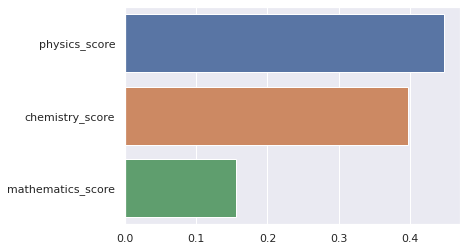

In [ ]:
# Biểu đồ thể hiện mức độ quan trọng điểm từng môn đến Khối A
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)

print('Vật Lý là môn quan trọng đối với điểm thí sinh thi Khối A\n')

In [ ]:
#Trực quan hóa mô hình Cây quyết định
feature = df1.columns[0:3]
target = df1['Khoi_A_rank'].unique()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image
import pydotplus


#Create DOT data
dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = feature, class_names = target)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.36943 to fit



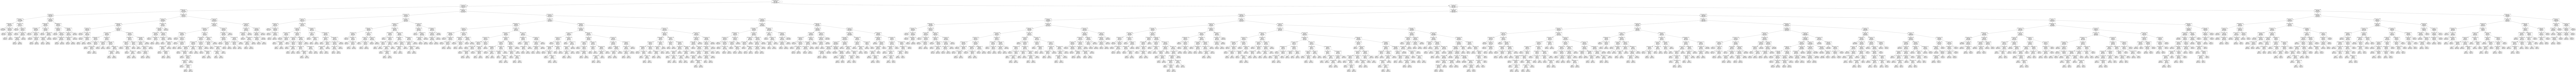

In [ ]:
#Vẽ mô hình
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())


In [ ]:
#Xuất file pdf, png
graph.write_pdf("D:\phantich_dulieu.pdf")
graph.write_png("D:\phantich_dulieu.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.36943 to fit



True